In [4]:
# !python -m venv env 
# !python -m pip install --upgrade pip
# !pip install tensorflow
# !pip install -U imbalanced-learn
# !pip install sklearn
# !pip install mediapipe
# !pip install opencv-python


### (Opcional) Redimensionar imágenes 

In [4]:
import cv2
import os

input_folder = "./classes_poses/"
output_folder = "./classes_poses_red/"
new_size = (224, 224)

for root, dirs, files in os.walk(input_folder):
    relative_path = os.path.relpath(root, input_folder)
    output_subfolder = os.path.join(output_folder, relative_path)
    os.makedirs(output_subfolder, exist_ok=True)
    for file in files:
        input_path = os.path.join(root, file)
        output_path = os.path.join(output_subfolder, file)
        img = cv2.imread(input_path)
        resized_img = cv2.resize(img, new_size)
        cv2.imwrite(output_path, resized_img)

## Grafico de una seña para cada clase

Matplotlib is building the font cache; this may take a moment.


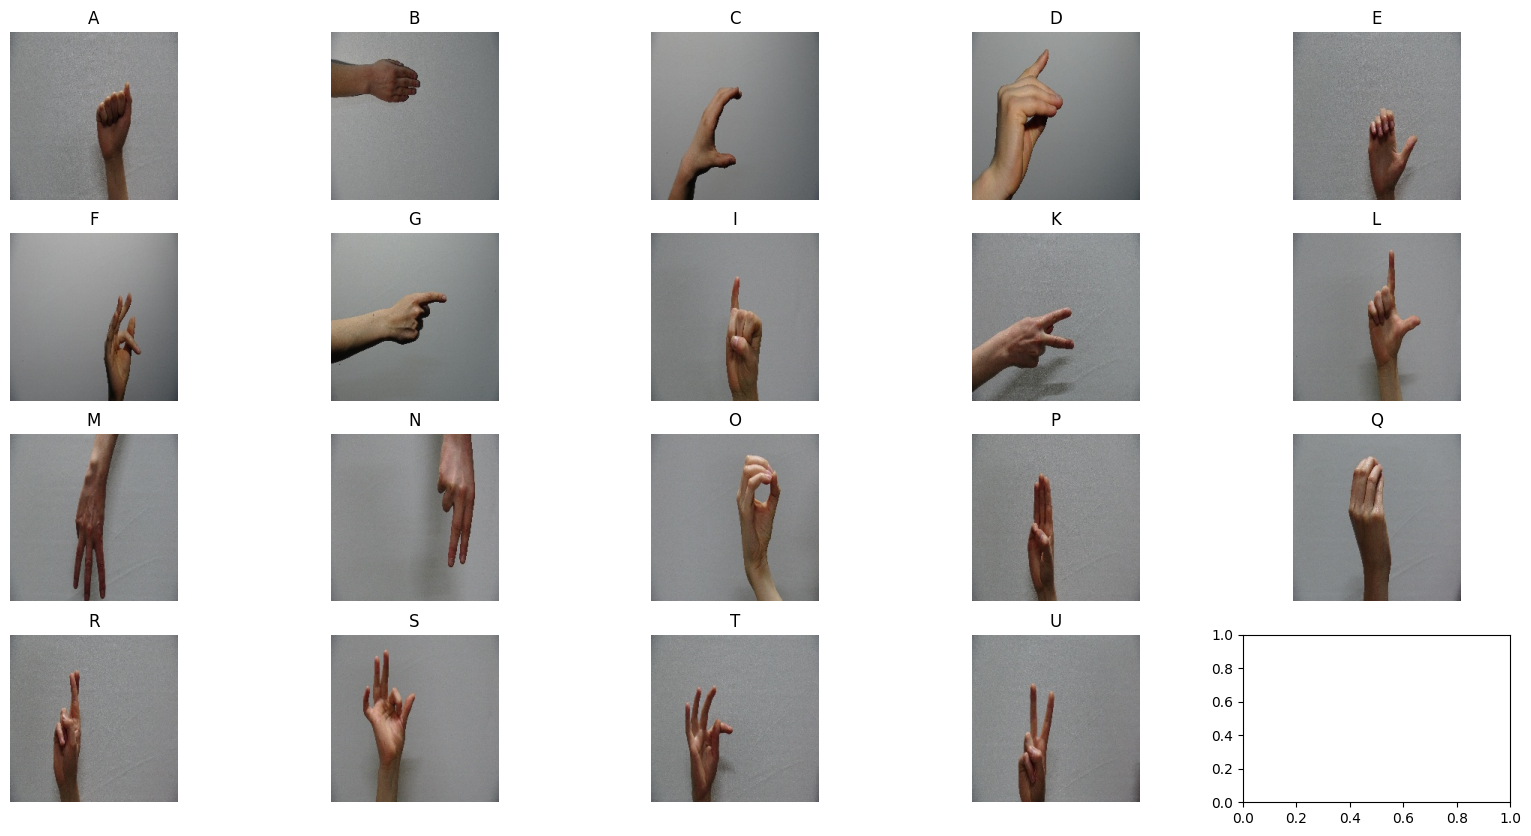

In [5]:
import matplotlib.pyplot as plt
import os
import random
from matplotlib import image as mpimg
import json

class_indices = json.load(open('class_indices.json'))
classes = list(class_indices.keys())
fig, axes = plt.subplots(4, 5, figsize=(20, 10))

for i in range(min(len(classes), 19)):
    class_name = classes[i]
    img_name = random.choice(os.listdir(f'./classes/{class_name}'))
    img_path = f'./classes/{class_name}/{img_name}'
    
    img = mpimg.imread(img_path)
    
    axes[i // 5, i % 5].imshow(img)
    axes[i // 5, i % 5].set_title(class_name)
    axes[i // 5, i % 5].axis('off')

plt.show()


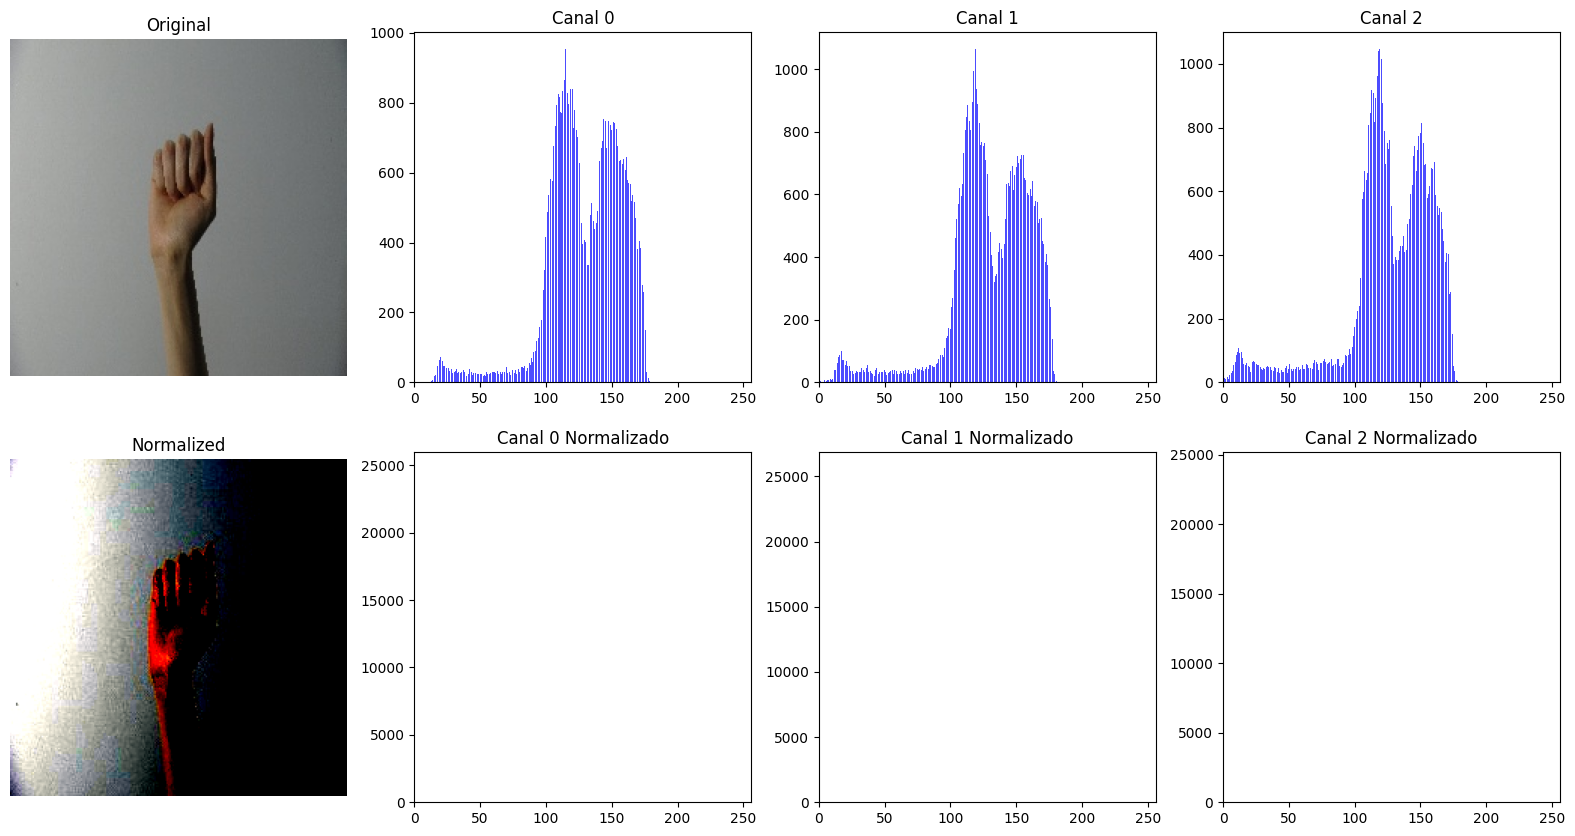

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def plot_histogram(ax, channel, title):
    ax.hist(channel.ravel(), bins=256, color='blue', alpha=0.7)
    ax.set_title(title)
    ax.set_xlim(0, 256)

img = cv2.imread("./classes/A/DSC00882.JPG")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

fig, axes = plt.subplots(2, 4, figsize=(20, 10))

axes[0, 0].imshow(img)
axes[0, 0].set_title('Original')
axes[0, 0].axis('off')

# Plot histograms before normalization
for i in range(3):
    channel = img[:, :, i]
    plot_histogram(axes[0, i + 1], channel, f'Canal {i}')

# Normalize the image
img_normalized = np.zeros_like(img, dtype=np.float32)

for i in range(3):  # Iterate over RGB channels
    channel = img[:, :, i] / 255.0  # Normalize to [0, 1]

    mean_channel = np.mean(channel)
    std_channel = np.std(channel)

    img_normalized[:, :, i] = np.divide((channel - mean_channel), std_channel, out=np.zeros_like(channel), where=std_channel != 0)

# Clip values to the valid range [0, 1] for display
img_normalized = np.clip(img_normalized, 0, 1)

axes[1, 0].imshow(img_normalized)
axes[1, 0].set_title('Normalized')
axes[1, 0].axis('off')

# Plot histograms after normalization
for i in range(3):
    channel_normalized = img_normalized[:, :, i]
    plot_histogram(axes[1, i + 1], channel_normalized, f'Canal {i} Normalizado')

plt.show()


## Definición de los estimadores de pose

restarle a cada canart por separado la media del canal y dividir por la desviación estandar, garantizo ma media de o y desviacion estandar de 1

tener canal el grises
aumentar el tamaño de lo spuntos y grosor del as lineas 
adquirir criterios para seleccionar los parametros


## Creación de dataset de poses

In [ ]:
import cv2
import mediapipe as mp
import os
import numpy as np

# Inicializar los modelos de MediaPipe
mp_hands = mp.solutions.hands

# Constantes para colores
BLUE = (255, 0, 0)



# Especificar la ruta de la carpeta de origen y destino
origen_carpeta = './classes_original/'
destino_carpeta = './classes_poses/'

# Inicializar el modelo de manos
hands = mp_hands.Hands()

# Recorrer la estructura de carpetas y archivos
for ruta_actual, _, archivos in os.walk(origen_carpeta):
    for archivo in archivos:
        clase = os.path.basename(ruta_actual)
        ruta_archivo = os.path.join(ruta_actual, archivo)
        
        frame = cv2.imread(ruta_archivo)
        
        if frame is None:
            print(f"No se pudo leer la imagen: {ruta_archivo}")
            continue  

        img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        hands_results = hands.process(img)
        black_frame = np.zeros_like(frame)

        if hands_results.multi_hand_landmarks:
            for landmarks in hands_results.multi_hand_landmarks:
                draw_hand_landmarks(black_frame, landmarks)

        archivo_nombre = os.path.basename(ruta_archivo)
        print(f"{clase} - {archivo_nombre} - {destino_carpeta}")
        destino = f"{destino_carpeta}/{clase}"

        os.makedirs(destino, exist_ok=True)
        # Guardar la imagen procesada en color
        cv2.imwrite(f"{destino}/{archivo_nombre}", black_frame)

# Cerrar la instancia del modelo de manos
hands.close()
